# Stroke Prediction using Decision Tree 

This notebook demonstrates how to train a **Decision Tree classifier** on a healthcare stroke dataset using **SMOTE** to handle imbalanced classes.
>SMOTE (Synthetic Minority Oversampling Technique)
SMOTE generates new synthetic samples for the minority class to balance imbalanced datasets, helping models learn better without simply duplicating data.

We will:  
1. Import and explore the dataset  
2. Split it into train and test sets  
3. Train a Decision Tree with SMOTE  
4. Evaluate performance  
5. Plot the Decision Tree


In [75]:
# Import necessary packages
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Setup path to import from 'modules' directory


current_dir = os.getcwd()  
sys.path.append(os.path.abspath(os.path.join(current_dir, '../../')))
from modules import tool_decision_tree


## 1. Import the Dataset
We'll load the dataset and display some basic information about it.


In [76]:
# Import dataset
current_dir = os.getcwd()  
data_path = os.path.join(current_dir, "stroke_updated.csv")
data = tool_decision_tree.importdata(data_path)

Dataset Length:  50000
Dataset Shape:  (50000, 15)
Dataset:     gender   age  hypertension  heart_disease  ever_married  Residence_type  \
0       1  80.3             0              0             1               1   
1       1  89.4             0              0             1               1   
2       0  87.5             0              0             1               1   
3       0  19.7             0              0             1               1   
4       0  85.2             0              0             1               0   

   avg_glucose_level   bmi  stroke  work_type_Govt_job  work_type_Private  \
0             170.38  18.4       0                   1                  0   
1             186.89  19.6       0                   0                  0   
2             118.42  34.7       0                   0                  0   
3             226.01  27.1       0                   0                  1   
4             229.64  27.6       0                   0                  0   

   work

## 2. Split Dataset
Split the dataset into features (X) and target (Y), then into training and test sets.


In [77]:
# Split dataset
X, Y, X_train, X_test, y_train, y_test = tool_decision_tree.prepare_dataset(data)


## 3. Train Decision Tree with SMOTE
We train the Decision Tree using **Entropy criterion** and apply SMOTE to balance the classes.  
We limit the tree depth and set a minimum number of samples per leaf to reduce overfitting.


In [78]:
# Train model using SMOTE
clf_smote = tool_decision_tree.train_using_entropy_smote(
    X_train, y_train, min_samples_leaf=20, max_depth=3
)


c:\Users\alaa\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


## 4. Make Predictions
Use the trained model to predict on the test set.


In [79]:
# Make predictions
y_pred_smote = tool_decision_tree.prediction(X_test, clf_smote)


Predicted values:
[0 0 0 ... 0 0 0]


## 5. Evaluate Performance
Check the **confusion matrix, accuracy, and classification report** to understand model performance.


In [80]:
# Evaluate performance
tool_decision_tree.cal_accuracy(y_test, y_pred_smote)


Confusion Matrix: 
[[9553    0]
 [ 447    0]]
Accuracy :  95.53
Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      9553
           1       0.00      0.00      0.00       447

    accuracy                           0.96     10000
   macro avg       0.48      0.50      0.49     10000
weighted avg       0.91      0.96      0.93     10000



c:\Users\alaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 6. Plot the Decision Tree
Visualize the trained decision tree with feature and class names.


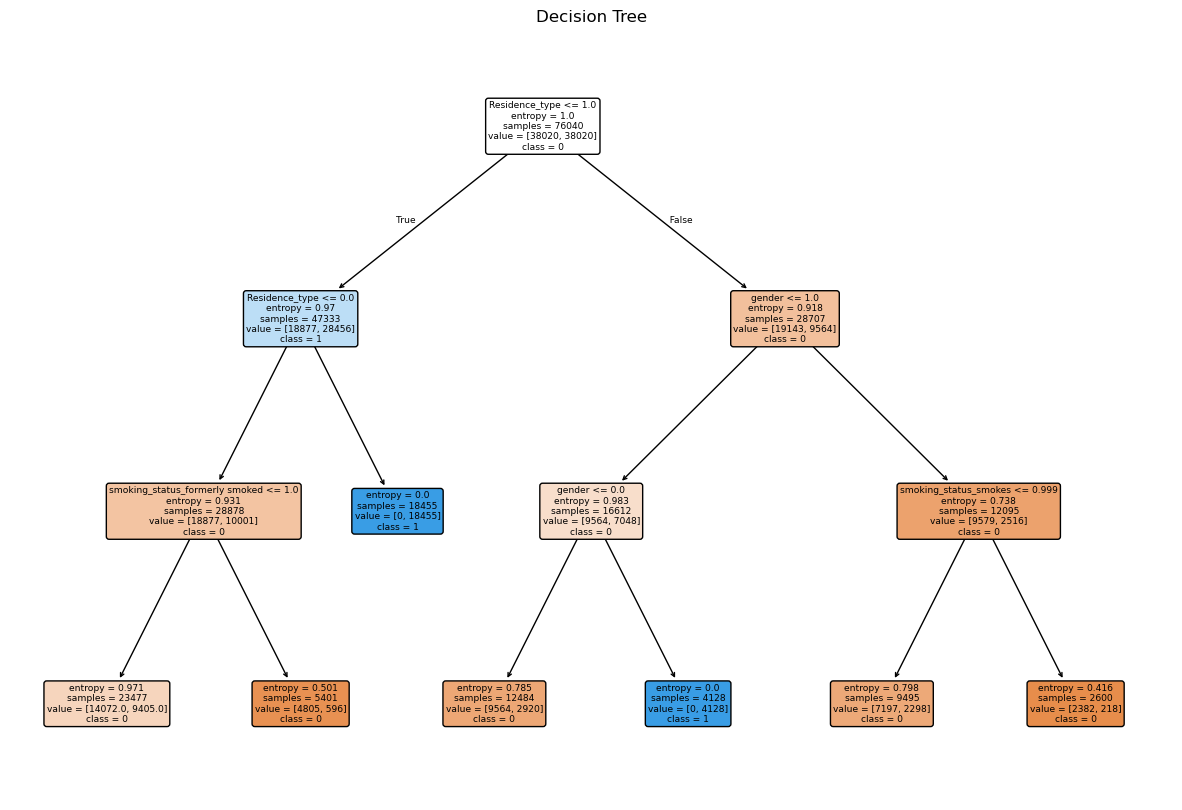

In [81]:
# Plot the decision tree
feature_names = [col for col in data.columns if col != "stroke"]
class_names = [str(cls) for cls in sorted(data["stroke"].unique())]
tool_decision_tree.plot_decision_tree(clf_smote, feature_names, class_names)